# Определение перспективного тарифа для телеком компании

## Описание проекта

*Заказчик проекта и описание продуктов:*

Компания «Мегалайн» — федеральный оператор сотовой связи. <br>
«Мегалайн» предлагает клиентам два тарифных плана: «Смарт» и «Ультра».<br>

Тариф «Смарт»
 - Ежемесячная плата: 550 рублей
   - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
   - минута разговора: 3 рубля
   - сообщение: 3 рубля
   - 1 Гб интернет-трафика: 200 рублей<br>
   
Тариф «Ультра»
 - Ежемесячная плата: 1950 рублей
   - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
   - минута разговора: 1 рубль
   - сообщение: 1 рубль
   - 1 Гб интернет-трафика: 150 рублей

*Цель проекта:*
- Определить какой тариф «Смарт» или «Ультра» приносит больше денег для корректировки рекламного бюджета коммерческим департаментом компании «Мегалайн».

*Для достижения цели проекта следует выполнить следующие задачи:*
1. Провести первичный анализ входных данных;
2. Провести предобработку данных и оценить ее качество;
3. Рассчитать показатели необходимые для проведения исследовательского анализа данных;
4. Проанализировать данные и описать поведение клиентов оператора;
5. Проверить гипотезы о средней выручке пользователей;
6. Сформировать выводы по результатом проведенного исследования.

## Описание входных данных

Компанией «Мегалайн» представлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Для анализа представлены 5 таблиц:

 - Таблица users (информация о пользователях);
 - Таблица calls (информация о звонках);
 - Таблица messages (информация о сообщени;
 - Таблица internet (информация об интернет-сессиях);
 - Таблица tariffs (информация о тарифах).

**Наименования столбцов, описание их содержания и единицы измерения:** 

##### Таблица users (информация о пользователях):
 - **user_id** — уникальный идентификатор пользователя
 - first_name — имя пользователя
 - last_name — фамилия пользователя
 - age — возраст пользователя (годы)
 - reg_date — дата подключения тарифа (день, месяц, год)
 - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
 - city — город проживания пользователя
 - tariff — название тарифного плана

##### Таблица calls (информация о звонках):
 - id — уникальный номер звонка
 - call_date — дата звонка
 - duration — длительность звонка в минутах
 - **user_id** — идентификатор пользователя, сделавшего звонок

##### Таблица messages (информация о сообщениях):
 - id — уникальный номер сообщения
 - message_date — дата сообщения
 - **user_id** — идентификатор пользователя, отправившего сообщение

##### Таблица internet (информация об интернет-сессиях):
 - id — уникальный номер сессии
 - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
 - session_date — дата интернет-сессии
 - **user_id** — идентификатор пользователя

##### Таблица tariffs (информация о тарифах):
 - tariff_name — название тарифа
 - rub_monthly_fee — ежемесячная абонентская плата в рублях
 - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
 - messages_included — количество сообщений в месяц, включённых в абонентскую плату
 - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
 - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
 - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Оглавление:

1. [Открытие данных и изучение общей информации](#start)
2. [Предобработка данных](#preprocessing) 
    * [Замена типа данных](#type) 
    * [Выявление и корректировка ошибок в данных](#mistake)
    * [Расчет ежемесячной выручки с каждого пользователя](#calculating) 
3. [Исследовательский анализ данных и описание поведения клиентов оператора](#analysis)
4. [Проверка гипотез о средней выручке пользователей](#hypothesis)
5. [Общий вывод](#result) 

## 1. Открытие данных и изучение общей информации <a id="start"></a>

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy import stats as st
from scipy.stats import norm
from sklearn import preprocessing
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
# Открие данных
df_users = pd.read_csv('/datasets/users.csv')
df_calls = pd.read_csv('/datasets/calls.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
#Получим общую информацию о предоставленных данных
display(df_users.head())
display(df_calls.head())
display(df_messages.head())
display(df_internet.head())
display(df_tariffs.head())

display(df_users.info())
display(df_calls.info())
display(df_messages.info())
display(df_internet.info())
display(df_tariffs.info())


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

In [4]:
# Изучим данные о продолжительности звонков и об объеме интернет-трафика
## Оценим объем нулевых значений продолжительности звонков и интернет-трафика
print(df_calls[df_calls['duration'] == 0].count())
print(df_internet[df_internet['mb_used'] == 0].count())

id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64
Unnamed: 0      19598
id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64


Общая характеристика данных о продолжительности звонков
count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64


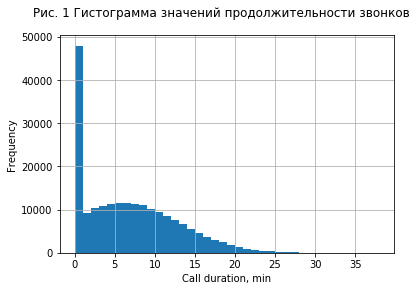

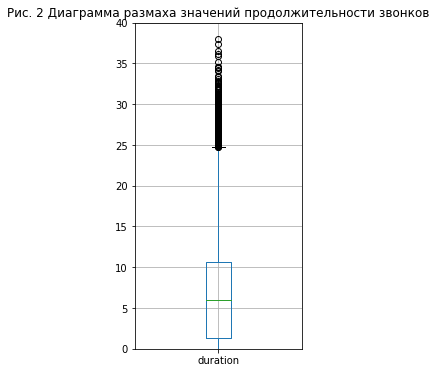

In [5]:
# Изучим данные о продолжительности звонков
## Общая характеристика данных о продолжительности звонков'
print('Общая характеристика данных о продолжительности звонков')
print(df_calls['duration'].describe())

## Построим гистограмму значений продолжительности звонков
df_calls['duration'].hist(bins=38, range=(0,38))
plt.suptitle('Рис. 1 Гистограмма значений продолжительности звонков')
plt.xlabel('Call duration, min')
plt.ylabel('Frequency')
plt.show()

## Построим box plot значений продолжительности звонков 
df_calls.boxplot(column='duration', figsize=(3, 6))
plt.ylim(0, 40)
plt.title('Рис. 2 Диаграмма размаха значений продолжительности звонков')
plt.show()

Общая характеристика данных о продолжительности звонков без нулевых значений
count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64


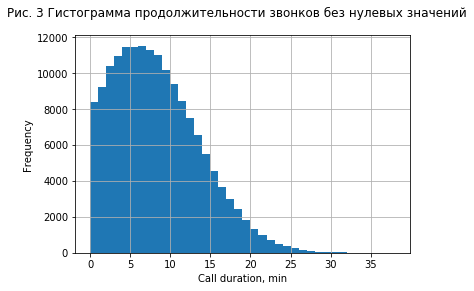

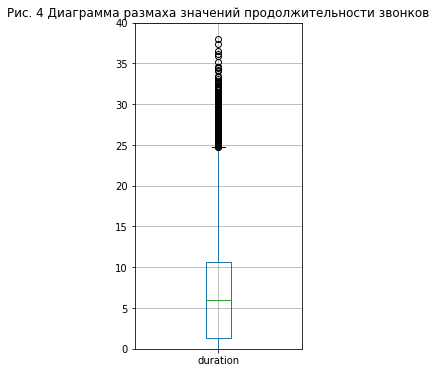

In [6]:
# Отбросим нулевые значения duration и проанализируем какое влияние на данные это оказало
## Общая характеристика данных о продолжительности звонков без нулевых значений
print('Общая характеристика данных о продолжительности звонков без нулевых значений')
print(df_calls.query('duration != 0')['duration'].describe())

## Построим гистограмму продолжительности звонков без нулевых значений
df_calls['duration'].hist(bins=38, range=(0.01,38))
plt.suptitle('Рис. 3 Гистограмма продолжительности звонков без нулевых значений')
plt.xlabel('Call duration, min')
plt.ylabel('Frequency')
plt.show()

## Построим box plot значений продолжительности звонков без нулевых значений
df_calls.boxplot(column='duration', figsize=(3, 6))
plt.ylim(0, 40)
plt.title('Рис. 4 Диаграмма размаха значений продолжительности звонков')
plt.show()

Общая характеристика данных о потреблении интернет-трафика
count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64


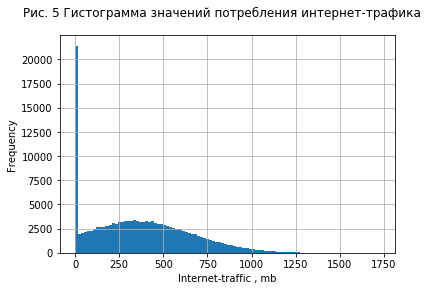

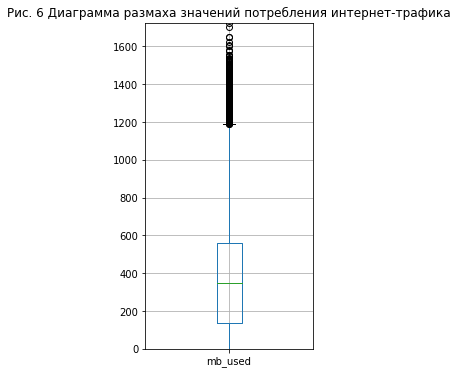

In [7]:
# Изучим данные об объеме интернет-трафика
## Общая характеристика данных о потреблении интернет-трафика
print('Общая характеристика данных о потреблении интернет-трафика')
print(df_internet['mb_used'].describe())

## Построим гистограмму значений потребления интернет-трафика
df_internet['mb_used'].hist(bins=100, range=(0,1724))
plt.suptitle('Рис. 5 Гистограмма значений потребления интернет-трафика')
plt.xlabel('Internet-traffic , mb')
plt.ylabel('Frequency')
plt.show()

## Построим box plot значений потребления интернет-трафика
df_internet.boxplot(column='mb_used', figsize=(3, 6))
plt.ylim(0, 1725)
plt.title('Рис. 6 Диаграмма размаха значений потребления интернет-трафика')
plt.show()

Общая характеристика данных о потреблении интернет-трафика без нулевых значений
count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64


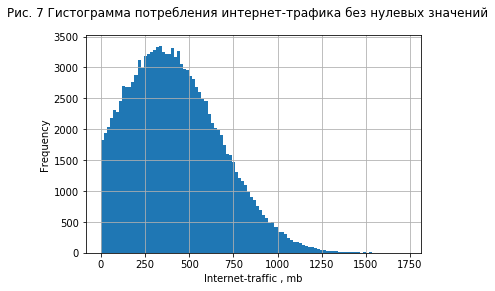

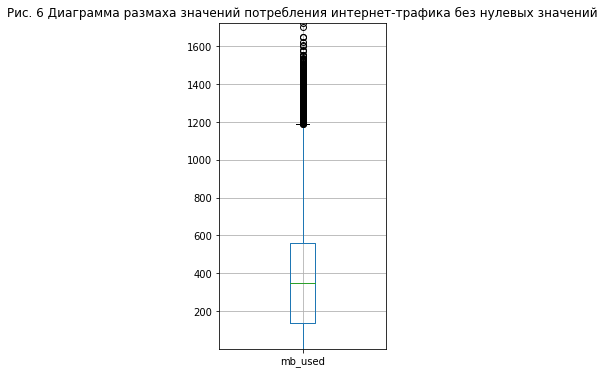

In [8]:
# Отбросим нулевые значения mb_used и проанализируем какое влияние на данные это оказало
## Общая характеристика данных о потреблении интернет-трафика без нулевых значений
print('Общая характеристика данных о потреблении интернет-трафика без нулевых значений')
print(df_internet.query('mb_used != 0')['mb_used'].describe())

## Построим гистограмму потребления интернет-трафика без нулевых значений
df_internet['mb_used'].hist(bins=100, range=(0.03,1724))
plt.suptitle('Рис. 7 Гистограмма потребления интернет-трафика без нулевых значений')
plt.xlabel('Internet-traffic , mb')
plt.ylabel('Frequency')
plt.show()

## Построим box plot значений потребления интернет-трафика без нулевых значений
df_internet.boxplot(column='mb_used', figsize=(3, 6))
plt.ylim(0.03, 1725)
plt.title('Рис. 6 Диаграмма размаха значений потребления интернет-трафика без нулевых значений')
plt.show()

### Вывод:
*Таблица users (информация о пользователях):*<br>
- Только у 38 пользователей тарифы не действовали на момент выгрузки (указана churn_date) - 7,6% абонентов. Т.к. исследование не предполагает анализа зависимости показателей датасета от даты отключения, заменим пропуски нулем. 
- Тип object в столбцах churn_date и reg_date будет корректнее заменить на datetime.

*Таблица calls:*
- Продолжительность звонка (duration) округлим в большую сторону до целых значений в соответствии с методикой расчета стоимости звонков оператора сети.  
- На гистограмме продолжительности звонка наблюдаем пик на нулевом значении. Количество звонков с продолжительностью равной нулю составляет 39'613 (20% от общего количества звонков). Допустим причина появления нулевых значений пропущенные вызовы. Мы считаем, что удаление строк с пропущенными звонками не повлияет на результаты исследования, т.к. основная цель - анализ доходности тарифа, при этом звонки с нулевой продолжительностью не оказывают влияние на данный показатель. Однако такой объем выбросов может существенно исказить значение среднего показателя. 
- Если убрать звонки с нулевой продолжительностью, средняя продолжительность звонка увеличится с 6.75 мин. до 8.4 мин. Кроме этого мы избавились от пика на нуле и наиболее частое значение продолжительности звонка стало равно 6 мин., что более реалистично.
- Тип object в столбце call_date будет корректнее заменить на datetime.

*Таблица messages:*
- Тип object в столбце message_date будет корректнее заменить на datetime.

*Таблица internet:*
- Тип object в столбце session_date будет корректнее заменить на datetime.
- Объем трафика (mb_used) округлим в большую сторону до целых значений в соответствии с методикой расчета стоимости трафика оператора сети. 
- На гистограмме объема трафика также наблюдаем пик на нулевом значении. В предоставленных данных в 19'598 сессиях (13% от общего количества сессий) объем трафика составил 0. 
- Если убрать сессии с нулевым потреблением трафика, среднее потребление интернет-трафика увеличится с 370 мб. до 426 мб. Кроме этого мы избавились от пика на нуле и наиболее частое значение интернет-трафика стало равно около 300 мб.

## 2. Предобработка данных  <a id="preprocessing"></a>

## 2.1. Выявление и корректировка ошибок в данных <a id="mistake"></a>

In [9]:
# На основе выводов первого этапа принимаем решение об удалении нулевых значений 
# из столбцов duration (df_calls) и mb_used (df_internet)
df_calls = df_calls.query('duration != 0')
df_internet = df_internet.query('mb_used != 0')

In [10]:
#Установим уникальные имена столбцов, кроме user_id
df_calls.columns = ['call_id', 'call_date', 'call_duration', 'user_id']
df_messages.columns = ['message_id', 'message_date', 'user_id']
df_internet.columns = ['0', 'internet_id', 'mb_used', 'session_date', 'user_id']
df_tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']

# Удали лишний столбец "Unnamed: 0" из таблицы df_internet
df_internet = df_internet.drop(columns='0')

In [11]:
# Сгруппируем таблицы calls, messages, internet по user_id и по date (месяц)

## Изменим в таблицах тип столбцов с датой на datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

## Добавим колонку с месяцем к каждой таблице (calls, messages, internet)
df_calls['month'] = df_calls['call_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month

In [12]:
## Сгруппируем данные в таблицах по о user_id и по date (месяц)
### Рассчитаем для каждого пользователя помесячно:
#### количество сделанных звонков
df_calls_number = df_calls.groupby(['user_id', 'month'])['call_id'].count()
#### количество израсходованных минут разговора
df_calls_grouped = df_calls.groupby(['user_id', 'month'])['call_duration'].sum()
#### количество отправленных сообщений
df_messages_grouped = df_messages.groupby(['user_id', 'month'])['message_id'].count()
#### объем израсходованного интернет-трафика
df_internet_grouped = df_internet.groupby(['user_id', 'month'])['mb_used'].sum()

## Последовательно объединим таблицы calls, messages, internet по user_id по ключу 'user_id' и 'month'
df_grouped = pd.merge(df_calls_grouped, df_calls_number, on=['user_id', 'month'], how='outer')
df_grouped = pd.merge(df_grouped, df_messages_grouped, on=['user_id', 'month'], how='outer')
df_grouped = pd.merge(df_grouped, df_internet_grouped, on=['user_id', 'month'], how='outer')
df_grouped = df_grouped.reset_index(drop=False)

## добавим данные из таблиц с информацией о клиентах и тарифах
df_grouped = pd.merge(df_grouped, df_users, on=['user_id'], how='outer')
df_grouped = pd.merge(df_grouped, df_tariffs, on=['tariff'], how='outer')

## Изучим полученную таблицу
display(df_grouped.head())
display(df_grouped.info())

,user_id,month,call_duration,call_id,message_id,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,150.06,17.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,158.90,28.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,318.80,41.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,389.87,42.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,440.14,46.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3216 non-null int64
month                    3214 non-null float64
call_duration            3168 non-null float64
call_id                  3168 non-null float64
message_id               2717 non-null float64
mb_used                  3201 non-null float64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null object
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute         

None

In [13]:
# Проанализируем строки с пропусками по столбцу 'month'
display(df_grouped[df_grouped['month'].isna()])
# Удалим строки с пропусками, вероятно, т. к. абоненты зарегистрировались только в конце года, у них нет расходных операции
df_grouped.dropna(subset = ['month'], inplace = True) 

,user_id,month,call_duration,call_id,message_id,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


In [14]:
# Проанализируем строки с пропусками по столбцу 'month'
display(df_grouped[df_grouped['call_duration'].isna()].head())

# Проанализируем строки с пропусками по столбцу 'month'
display(df_grouped[df_grouped['message_id'].isna()].head())

# Проанализируем строки с пропусками по столбцу 'mb_used'
display(df_grouped[df_grouped['mb_used'].isna()].head())

# В некоторые месяцы абоненты могли никому не звонить или, тем более, не отправлять СМС, а использовать для этого интернет 
# или вторую симкарту. Ряд абонентов наоборот могли не использовать симку для серфинга в интернете.

# Заполним пропуски в call_duration, message_id и mb_used нулевыми значениями
df_grouped['call_duration'] = df_grouped['call_duration'].fillna(value=0)
df_grouped['call_id'] = df_grouped['call_id'].fillna(value=0)
df_grouped['message_id'] = df_grouped['message_id'].fillna(value=0)
df_grouped['mb_used'] = df_grouped['mb_used'].fillna(value=0)

,user_id,month,call_duration,call_id,message_id,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
388,1240,2.0,NaN,NaN,NaN,959.51,30,NaN,Воронеж,Зинаида,Шарова,2018-02-27,ultra,1000,30720,3000,1950,150,1,1
425,1257,7.0,NaN,NaN,146.0,20014.22,21,NaN,Санкт-Петербург,Габриель,Жданов,2018-06-17,ultra,1000,30720,3000,1950,150,1,1
426,1257,8.0,NaN,NaN,157.0,25482.16,21,NaN,Санкт-Петербург,Габриель,Жданов,2018-06-17,ultra,1000,30720,3000,1950,150,1,1
427,1257,9.0,NaN,NaN,153.0,22753.12,21,NaN,Санкт-Петербург,Габриель,Жданов,2018-06-17,ultra,1000,30720,3000,1950,150,1,1
934,1476,4.0,NaN,NaN,NaN,530.78,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1


,user_id,month,call_duration,call_id,message_id,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
49,1024,10.0,76.22,6.0,NaN,3310.05,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,1000,30720,3000,1950,150,1,1
50,1024,11.0,1083.14,127.0,NaN,43107.47,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,1000,30720,3000,1950,150,1,1
51,1024,12.0,898.21,108.0,NaN,35948.13,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,1000,30720,3000,1950,150,1,1
67,1049,3.0,380.10,47.0,NaN,6195.54,41,NaN,Москва,Габриель,Ларин,2018-03-10,ultra,1000,30720,3000,1950,150,1,1
68,1049,4.0,501.56,53.0,NaN,5291.10,41,NaN,Москва,Габриель,Ларин,2018-03-10,ultra,1000,30720,3000,1950,150,1,1


,user_id,month,call_duration,call_id,message_id,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
151,1094,5.0,101.46,12.0,3.0,NaN,37,NaN,Новосибирск,Даниэла,Пугачева,2018-05-28,ultra,1000,30720,3000,1950,150,1,1
451,1273,5.0,208.76,19.0,21.0,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
452,1273,6.0,215.89,28.0,38.0,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
453,1273,7.0,236.07,30.0,37.0,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
454,1273,8.0,229.98,39.0,41.0,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1


In [15]:
# Дата отключения тарифа указана для 7,6% абонентов. Данный параметр не актуален для исследования, но не будем пока его удалять
# Заполним нулевыми знычениями
df_grouped['churn_date'] = df_grouped['churn_date'].fillna(value=0)

# Проверим, что пропуски отработаны успешно
display(df_grouped.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3214
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null float64
call_duration            3214 non-null float64
call_id                  3214 non-null float64
message_id               3214 non-null float64
mb_used                  3214 non-null float64
age                      3214 non-null int64
churn_date               3214 non-null object
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null object
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute        

None

In [16]:
# Скорректируем наименования столбцов в таблице
df_grouped.rename(columns={'call_id': 'call_number', 'message_id': 'message_number'}, inplace=True)

### Вывод:
- В результате предобработки данных данные были очищены от звонков с нулевой продолжительностью (возможно, звонки были пропущены), а также от интернет-сессий с нулевым объемом передачи трафика (возможно, не было установлено соединение).
- Таблицы с информацией о звонка, сообщениях и интрнет-сессиях были сгруппированы по месяцам и абонентам, агрегирована информация по количеству звонков, сообщений, объему трафика и продолжительности звонков, затем последовательно объединены в единую таблицу. К полученной таблице были добавлены данные о пользователях из таблицы users и информация по тарифным планам из таблицы tarrifs.
- В результате группировки были рассчитаны для каждого пользователя по месяцам:
  1. количество сделанных звонков и израсходованных минут разговора
  2. количество отправленных сообщений
  3. объем израсходованного интернет-трафика
- В полученной единой таблице были удалены данные по новым пользователям, по которым отсутствует информация о звонках, сообщениях и  интрнет-трафике, т.к. они не имеют значимости для достижения цели исследования.
- В столбцах call_duration, message_id, mb_used пропущенные значения были заполнены нулевыми значениями, исходя из предположения, что некоторые абоненты не каждый месяц отправляют сообщения, осуществляют звонки или используют интернет. Например, они могут звонить и отправлять сообщения через интернет приложения. С другой стороны абоненты могут использовать для интернета вторую симкарту.
- Только у 38 пользователей тарифы не действовали на момент выгрузки (указана churn_date) - 7,6% абонентов. Т.к. исследование не предполагает анализа зависимости показателей датасета от даты отключения, пропуски были заменены нулем.

## 2.2. Замена типа данных <a id="type"></a>

In [17]:
# В столбцах с датами изменим тип на datetime
df_grouped['churn_date'] = pd.to_datetime(df_grouped['churn_date'], format='%Y-%m-%d')
df_grouped['reg_date'] = pd.to_datetime(df_grouped['reg_date'], format='%Y-%m-%d')

# В столбцах month и message_id исправим тип на целочисленный
df_grouped['month'] = df_grouped['month'].astype('int')
df_grouped['message_number'] = df_grouped['message_number'].astype('int')
df_grouped['call_number'] = df_grouped['call_number'].astype('int')

# Продолжительность звонка (duration) и объем трафика mb_used округлим в большую сторону до целых значений
# в соответствии с методикой расчета стоимости звонков и трафика оператора сети.
df_grouped['call_duration'] = np.ceil(df_grouped['call_duration']).astype('int64') 
df_grouped['mb_used'] = np.ceil(df_grouped['mb_used']).astype('int64') 

# Проверим, что замена прошла успешно
display(df_grouped.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3214
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
call_duration            3214 non-null int64
call_number              3214 non-null int64
message_number           3214 non-null int64
mb_used                  3214 non-null int64
age                      3214 non-null int64
churn_date               3214 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute  

None

### Вывод:
- В результате корректировки тип данных в столбцах, содержащих дату, был заменен тип на datetime.
- В столбцах, содержащих месяц, количеством звонков и количество сообщений, тип данных был заменен на целочисленный, т.к. содержание столбцов не предполагает дробные значения.
- Значения в столбцах с продолжительностью звонков (call_duration) и объемом трафика (mb_used) были округлены в большую сторону в соответствии с методикой расчета стоимости звонков и трафика оператора сети, а тип данных изменен на целочисленный.

## 2.3. Расчет помесячной выручки с каждого пользователя  <a id="calculating"></a>

In [18]:
# Напишем построчную функцию для расчета помесячной выручки с каждого пользователя
def income_per_month(row):
    
    call_over = row['call_duration'] - row['minutes_included']
    message_over = row['message_number'] - row['messages_included']
    mb_used_over = row['mb_used'] - row['mb_per_month_included']
    
    income = row['rub_monthly_fee']
    
    if call_over > 0:
        income += call_over * row['rub_per_minute']
    if message_over > 0:
        income += message_over * row['rub_per_message']
    if mb_used_over > 0:
        income += np.ceil(mb_used_over/1024) * row['rub_per_gb']
    return(income)
        
# Добавим столбец с выручкой в таблицу df_grouped
df_grouped['income_per_month'] = df_grouped.apply(income_per_month, axis=1)

# Проанализируем корректность выполнения функции
display(df_grouped.head())
display(df_grouped.tail())

,user_id,month,call_duration,call_number,message_number,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income_per_month
0,1000,5,151,17,22,2254,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,159,28,60,23234,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,319,41,75,14004,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,390,42,81,14056,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,441,46,57,14569,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0


,user_id,month,call_duration,call_number,message_number,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income_per_month
3210,1489,8,0,0,17,11051,35,1970-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,550.0
3211,1489,9,0,0,32,17207,35,1970-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,950.0
3212,1489,10,0,0,21,19560,35,1970-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,1550.0
3213,1489,11,0,0,20,17492,35,1970-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,1150.0
3214,1489,12,0,0,35,17323,35,1970-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,950.0


### Вывод:
- Количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам были расчитаны путем группировки таблиц по пользователю и по месяцу.
- Помесячная выручка с каждого пользователя была рассчита с использованием функции, которая принимает на вход строку, затем осуществляется проверка превышения лимита тарифа путем ввода if-условия в функцию, при наличии сумма превышения умножается на ставку соответствующего тарифного плана.

## 3. Исследовательский анализ данных и описание поведения клиентов оператора  <a id="analysis"></a>

In [19]:
# Определим среднее значение, медиану и сумму продолжительности звонков, количества сообщений и объема интернет трафика 
# по каждому тарифу по месяцам:
print('Среднее значение, медиана и сумма продолжительности звонков, количества сообщений и объема интернет трафика, которые пользователи тарифа ULTRA используют по месяцам')
df_ultra_pivot = (df_grouped
            .query('tariff == "ultra"')
            .pivot_table(index='month', values=('call_duration', 'message_number', 'mb_used'), aggfunc=['mean', 'median', 'sum'])
            .reset_index(drop=False)
           )
df_ultra_pivot.columns = (['month', 
                           'mean_call_duration', 'mean_mb_used', 'mean_message_number', 
                           'median_call_duration', 'median_mb_used', 'median_message_number', 
                           'sum_call_duration', 'sum_mb_used', 'sum_message_number'])
display(df_ultra_pivot.head())
print()
print('Среднее значение, медиана и сумма продолжительности звонков, количества сообщений и объема интернет трафика, которые пользователи тарифа SMART используют по месяцам')
df_smart_pivot = (df_grouped
            .query('tariff == "smart"')
            .pivot_table(index='month', values=('call_duration', 'message_number', 'mb_used'), aggfunc=['mean', 'median', 'sum'])
            .reset_index(drop=False)
           )

df_smart_pivot.columns = (['month', 
                           'mean_call_duration', 'mean_mb_used', 'mean_message_number', 
                           'median_call_duration', 'median_mb_used', 'median_message_number', 
                           'sum_call_duration', 'sum_mb_used', 'sum_message_number'])
display(df_smart_pivot.head())

Среднее значение, медиана и сумма продолжительности звонков, количества сообщений и объема интернет трафика, которые пользователи тарифа ULTRA используют по месяцам


,month,mean_call_duration,mean_mb_used,mean_message_number,median_call_duration,median_mb_used,median_message_number,sum_call_duration,sum_mb_used,sum_message_number
0,1,405.333333,13141.333333,33.777778,360.0,14792.0,32.0,3648,118272,304
1,2,281.125000,11776.333333,21.958333,157.0,7327.5,5.5,6747,282632,527
2,3,462.972973,17536.081081,32.297297,381.0,17496.0,20.0,17130,648835,1195
3,4,432.363636,16828.618182,31.563636,428.0,16646.0,17.0,23780,925574,1736
4,5,482.208955,19363.671642,37.850746,486.0,18697.0,25.0,32308,1297366,2536



Среднее значение, медиана и сумма продолжительности звонков, количества сообщений и объема интернет трафика, которые пользователи тарифа SMART используют по месяцам


,month,mean_call_duration,mean_mb_used,mean_message_number,median_call_duration,median_mb_used,median_message_number,sum_call_duration,sum_mb_used,sum_message_number
0,1,193.500000,8514.176471,18.235294,156.5,7097.0,15,6579,289482,620
1,2,283.413793,11597.517241,24.086207,243.5,12554.5,20,16438,672656,1397
2,3,368.337662,15104.649351,31.857143,387.0,15671.0,23,28362,1163058,2453
3,4,346.767857,13462.651786,30.741071,350.0,14088.0,28,38838,1507817,3443
4,5,365.709220,15805.659574,33.773050,408.0,16324.0,30,51565,2228598,4762


In [20]:
# Определим количество пользователей по тарифам
print('Ultra users:', len(df_users.query('tariff == "ultra"')))
print('Smart users:', len(df_users.query('tariff == "smart"')))

Ultra users: 149
Smart users: 351


### Вывод:
- Средняя продолжительность звонка во все месяцы кроме февраля выше у пользователей на тарифе Ultra. Медиана значений продолжительности звонка также почти во все месяцы выше у пользователей на тарифе Ultra.
- Средний объем интернет-трафика в каждом месяце также выше у пользователей на тарифе Ultra. Медианы значений объема интернет-трафика во все месяцы кроме февраля также выше у пользователей на тарифе Ultra.
- Среднее количество сообщений также во все месяцы кроме февраля выше у пользователей на тарифе Ultra.
- Полученные результаты вполне ожидаемы и логичны, пользователи, использующие тариф Ultra, который имеет более высокий лимит звонков, сообщений и интернет-трафика, в среднем больше потребляют услуг (звонки, сообщения, интернет). 
- Суммарные значения продолжительности звонков, количества сообщений и интернет-трафика на тарифе Smart значительно превышают анлогичные значения на тарифе Smart. На наш взгляд, данный факт обусловлен тем, что тариф смарт используют в 2,4 раза больше пользователей, чем тариф Ultra.

In [21]:
# Определим дисперсию и стандартное отклонение по месяцам
## Сформируем таблицу с дисперсией и стандартным отклонением по тарифу Ultra
df_ultra_var_std = (df_grouped
            .query('tariff == "ultra"')
            .pivot_table(index='month', values=('call_duration', 'message_number', 'mb_used'), aggfunc=(np.var, np.std))
            .reset_index(drop=False)
           )
df_ultra_var_std.columns = (['month', 'std_call_duration', 'var_call_duration', 'std_mb_used', 
                             'var_mb_used', 'std_message_number', 'var_message_number'])

## Сформируем таблицу с дисперсией и стандартным отклонением по тарифу Smart
df_smart_var_std = (df_grouped
            .query('tariff == "smart"')
            .pivot_table(index='month', values=('call_duration', 'message_number', 'mb_used'), aggfunc=(np.var, np.std))
            .reset_index(drop=False)
           )
df_smart_var_std.columns = (['month', 'std_call_duration', 'var_call_duration', 'std_mb_used', 
                             'var_mb_used', 'std_message_number', 'var_message_number'])

display(df_ultra_var_std)
display(df_smart_var_std)

,month,std_call_duration,var_call_duration,std_mb_used,var_mb_used,std_message_number,var_message_number
0,1,254.725833,64885.250000,6865.558699,4.713590e+07,30.670742,940.694444
1,2,281.091864,79012.635870,10644.816978,1.133121e+08,26.773574,716.824275
2,3,315.652894,99636.749249,10951.862029,1.199433e+08,41.621886,1732.381381
3,4,253.085358,64052.198653,9718.722114,9.445356e+07,37.513831,1407.287542
4,5,273.429761,74763.834464,10046.112771,1.009244e+08,40.306874,1624.644052
5,6,286.471320,82065.816982,9292.844580,8.635696e+07,44.567899,1986.297619
6,7,290.152707,84188.593162,10065.198600,1.013082e+08,48.703621,2372.042735
7,8,295.343064,87227.525657,10476.586961,1.097589e+08,46.601923,2171.739199
8,9,306.742271,94090.821053,9486.131416,8.998669e+07,46.398874,2152.855530
9,10,308.046705,94892.772624,9803.095072,9.610067e+07,51.934398,2697.181661


,month,std_call_duration,var_call_duration,std_mb_used,var_mb_used,std_message_number,var_message_number
0,1,146.327828,21411.833333,6444.688602,4.153401e+07,16.197753,262.367201
1,2,180.973783,32751.509982,6247.328777,3.902912e+07,21.750809,473.097701
2,3,181.538137,32956.095010,5828.242162,3.396841e+07,26.804710,718.492481
3,4,176.135134,31023.585264,5698.221206,3.246972e+07,24.538532,602.139559
4,5,176.560210,31173.507700,5978.260685,3.573960e+07,27.036845,730.990983
5,6,165.692262,27453.925595,5791.133143,3.353722e+07,28.404337,806.806374
6,7,169.742879,28812.644975,5897.188740,3.477684e+07,28.282288,799.887811
7,8,176.475907,31143.745845,5593.500857,3.128725e+07,28.952677,838.257501
8,9,173.292987,30030.459326,5196.131409,2.699978e+07,28.117927,790.617820
9,10,177.992516,31681.335609,5859.384178,3.433238e+07,28.567673,816.111966


### Вывод:
- Дисперсия и стандартное отклонение значений продолжителльности звонков, объема интернет трафика, количества сообщений по месяцам были определены путем получения среза данных по кажому из тарифов и последующей группировки путем формирования сводных таблиц.
- Стандартное отклонение значений продолжительности звонков на тарифе Ultra составляет около 300 мин., при этом на тарифе Smart почти в два раза меньше - около 170 мин. Стандартное отклонение значений объема интернет-трафика на тарифе Ultra составляет около 9 гб., при этом на тарифе Smart около 6 гб. Стандартное отклонение значений количества сообщений на тарифе Ultra около 42, а на тарифе Smart около 24. В зависимости от месяца волатильность показателей стандартного откланения не очень существенна.

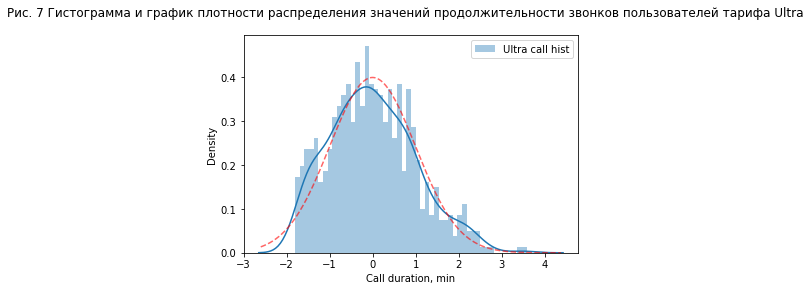

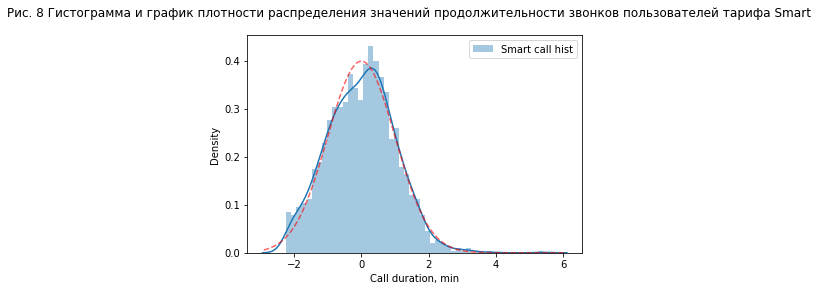

Text(0, 0.5, 'Density')

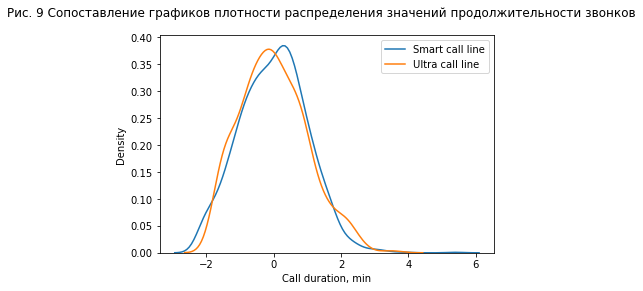

In [22]:
# Построим гистограммы для сравнения и описания распределений значений продолжительности звонков по тарифам Ultra и Smart

# Сформируем срезы данных по тарифам, учтем что нулевыми значениями заполнялись пропуски
df_ultra = df_grouped.query('tariff == "ultra" & call_duration != 0 & mb_used != 0 & message_number != 0')
df_smart = df_grouped.query('tariff == "smart" & call_duration != 0 & mb_used != 0 & message_number != 0')

# Масштабируем данные для приведения их к общей шкале без потери информации о различии диапазонов
normalized_ultra_call=(df_ultra['call_duration'] - df_ultra['call_duration'].mean()) / df_ultra['call_duration'].std()
normalized_smart_call=(df_smart['call_duration'] - df_smart['call_duration'].mean()) / df_smart['call_duration'].std()

# Построим график и гистограмму плотности распределения значений продолжительности звонков пользователей тарифа Ultra
sns.distplot(normalized_ultra_call, bins=50, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label = "Ultra call hist")
plt.suptitle('Рис. 7 Гистограмма и график плотности распределения значений продолжительности звонков пользователей тарифа Ultra')
plt.xlabel('Call duration, min') 
plt.ylabel('Density')
plt.legend()
plt.show()

# Построим график и гистограмму плотности распределения значений продолжительности звонков пользователей тарифа Smart
sns.distplot(normalized_smart_call, bins=50, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label="Smart call hist")
plt.suptitle('Рис. 8 Гистограмма и график плотности распределения значений продолжительности звонков пользователей тарифа Smart')
plt.xlabel('Call duration, min')
plt.ylabel('Density')
plt.legend()
plt.show()

# Сделаем сопоставление графиков плотности распределения значений продолжительности звонков двух тарифов
sns.distplot(normalized_smart_call, bins=50, hist=False, label = "Smart call line") 
sns.distplot(normalized_ultra_call, bins=50, hist=False, label = "Ultra call line") 
plt.suptitle('Рис. 9 Сопоставление графиков плотности распределения значений продолжительности звонков')
plt.xlabel('Call duration, min')
plt.legend()
plt.ylabel('Density')

### Вывод:
В результате данного блока были построенны гистограммы и графики плотности распределения значений продолжительности звонков тарифов Ultra и Smart. Как видно исходя из рис. 7 и рис. 8 распределение значений по тарифам Ultra и Smart практически совпадает с линией нормального распределения. Исходя из этого можно считать, что они имеют нормальное распределение.
<br> При этом исходя из сопоставления графиков плотности распределений (рис. 9), можно заключить, что значения продолжительности звонков распределены практически одинаково независимо от тарифа.

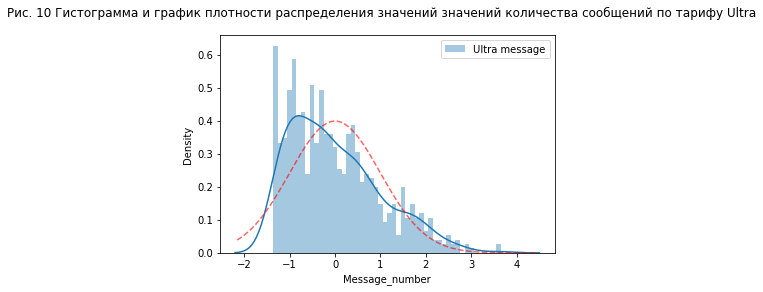

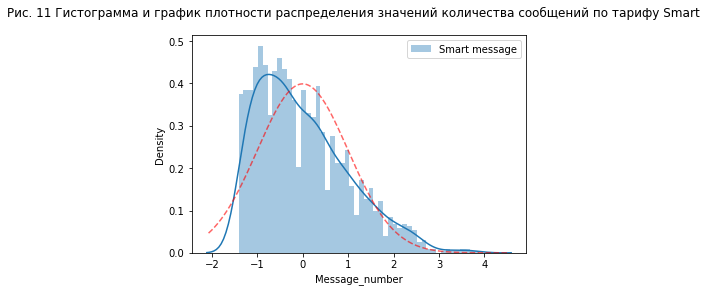

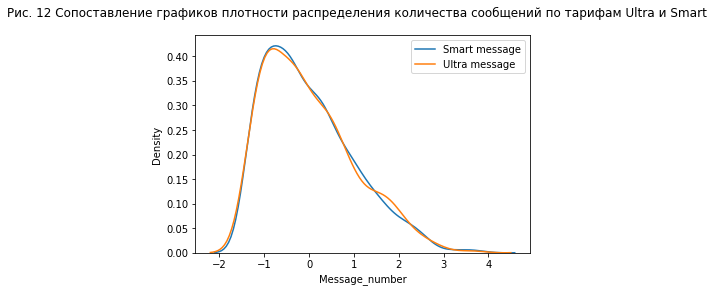

In [23]:
# Построим гистограммы для сравнения и описания распределений значений количества сообщений по тарифам Ultra и Smart

# Масштабируем данные для приведения их к общей шкале без потери информации о различии диапазонов
normalized_ultra_message =(df_ultra['message_number'] - df_ultra['message_number'].mean()) / df_ultra['message_number'].std()
normalized_smart_message =(df_smart['message_number'] - df_smart['message_number'].mean()) / df_smart['message_number'].std()

# Построим график и гистограмму плотности распределения значений количества сообщений по тарифу Ultra
sns.distplot(normalized_ultra_message, bins=50, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label = "Ultra message")
plt.suptitle('Рис. 10 Гистограмма и график плотности распределения значений значений количества сообщений по тарифу Ultra')
plt.xlabel('Message_number')
plt.ylabel('Density')
plt.legend()
plt.show()

# Построим график и гистограмму плотности распределения значений количества сообщений по тарифу Smart
sns.distplot(normalized_smart_message, bins=50, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label = "Smart message") 
plt.suptitle('Рис. 11 Гистограмма и график плотности распределения значений количества сообщений по тарифу Smart')
plt.xlabel('Message_number')
plt.ylabel('Density')
plt.legend()
plt.show()

# Сделаем сопоставление графиков плотности распределения значений количества сообщений по тарифам Ultra и Smart
sns.distplot(normalized_smart_message, bins=50, hist=False, label = "Smart message")
sns.distplot(normalized_ultra_message, bins=50, hist=False, label = "Ultra message")
plt.suptitle('Рис. 12 Сопоставление графиков плотности распределения количества сообщений по тарифам Ultra и Smart')
plt.xlabel('Message_number')
plt.ylabel('Density')
plt.legend()

### Вывод:
В результате данного блока были построенны гистограммы и графики плотности распределения значений количества сообщений по тарифам Ultra и Smart. Как видно исходя из рис. 10 и рис. 11 распределение значений по тарифам Ultra и Smart отклоняется влево от линии нормального распределения. Исходя из этого можно считать, что значения имеют нормальное распределение с положительной ассиметрией.
<br> При этом исходя из сопоставления графиков плотности распределений (рис. 12), можно заключить, что значения количества сообщений распределены практически одинаково независимо от тарифа.

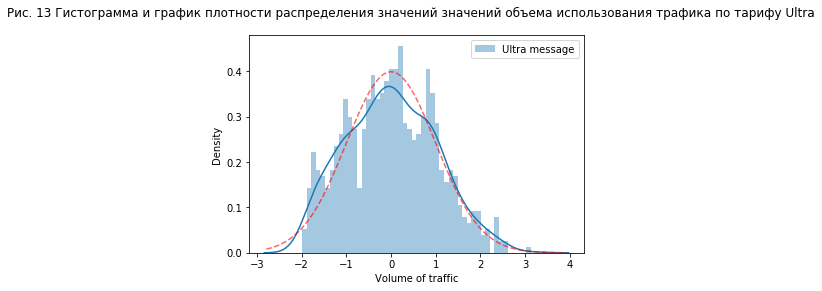

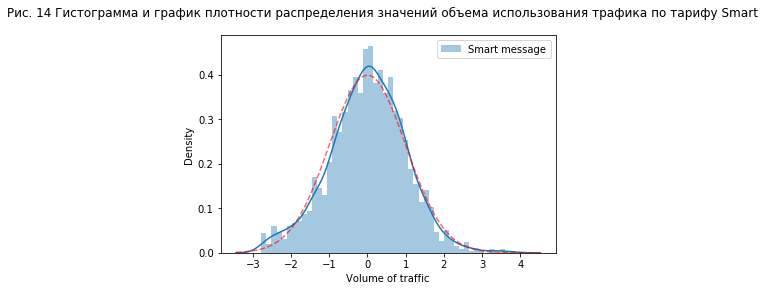

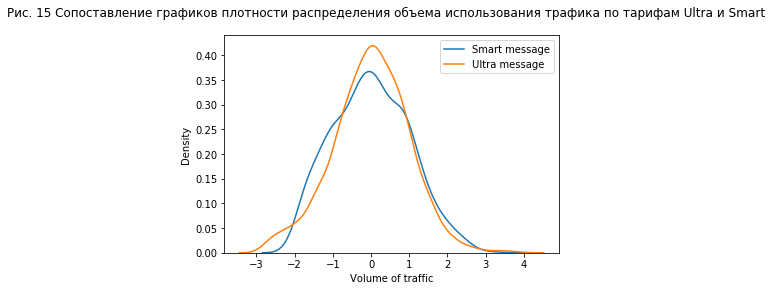

In [24]:
# Построим гистограммы для сравнения и описания распределений значений объема использования трафика по тарифам Ultra и Smart

# Масштабируем данные для приведения их к общей шкале без потери информации о различии диапазонов
normalized_ultra_traffic =(df_ultra['mb_used'] - df_ultra['mb_used'].mean()) / df_ultra['mb_used'].std()
normalized_smart_traffic =(df_smart['mb_used'] - df_smart['mb_used'].mean()) / df_smart['mb_used'].std()

# Построим график и гистограмму плотности распределения значений объема использования трафика по тарифу Ultra
sns.distplot(normalized_ultra_traffic, bins=50, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label = "Ultra message")
plt.suptitle('Рис. 13 Гистограмма и график плотности распределения значений значений объема использования трафика по тарифу Ultra')
plt.xlabel('Volume of traffic')
plt.ylabel('Density')
plt.legend()
plt.show()

# Построим график и гистограмму плотности распределения значений объема использования трафика по тарифу Smart
sns.distplot(normalized_smart_traffic, bins=50, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label = "Smart message") 
plt.suptitle('Рис. 14 Гистограмма и график плотности распределения значений объема использования трафика по тарифу Smart')
plt.xlabel('Volume of traffic')
plt.ylabel('Density')
plt.legend()
plt.show()

# Сделаем сопоставление графиков плотности распределения значений объема использования трафика по тарифам Ultra и Smart
sns.distplot(normalized_ultra_traffic, bins=50, hist=False, label = "Smart message")
sns.distplot(normalized_smart_traffic, bins=50, hist=False, label = "Ultra message")
plt.suptitle('Рис. 15 Сопоставление графиков плотности распределения объема использования трафика по тарифам Ultra и Smart')
plt.xlabel('Volume of traffic')
plt.ylabel('Density')
plt.legend()

### Вывод:
В результате данного блока были построенны гистограммы и графики плотности распределения значений объема интрнет-трафика по тарифам Ultra и Smart. Как видно исходя из рис. 13 и рис. 14 распределение значений по тарифам Ultra и Smart практически совпадает с линией нормального распределения. Исходя из этого можно считать, что они имеют нормальное распределение. Также отметим, что распределение значений по тарифу Ultra имеет отрицательный эксцесс, в то время как распределение значение по тарифу Smart эксцесс положительный.
<br> При этом исходя из сопоставления графиков плотности распределений (рис. 15), можно заключить, что значения объема интрнет-трафика распределены имеют сходное распределение независимо от тарифа.

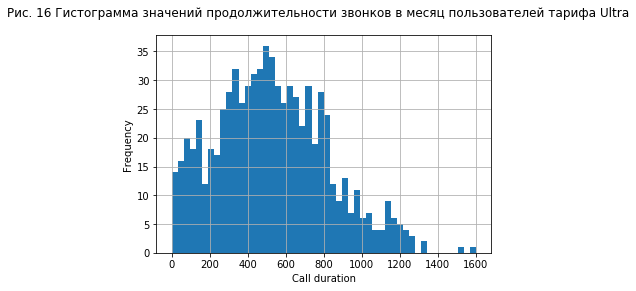

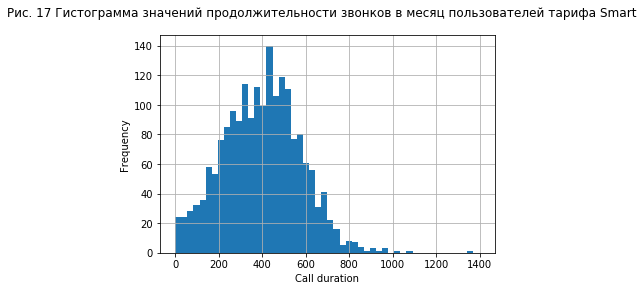

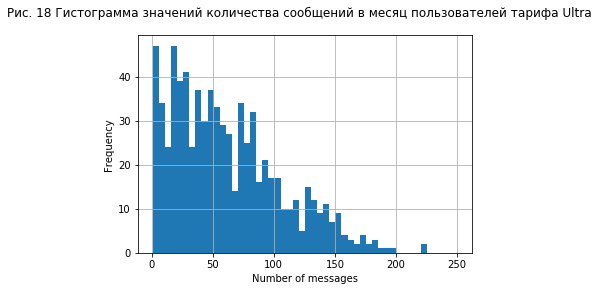

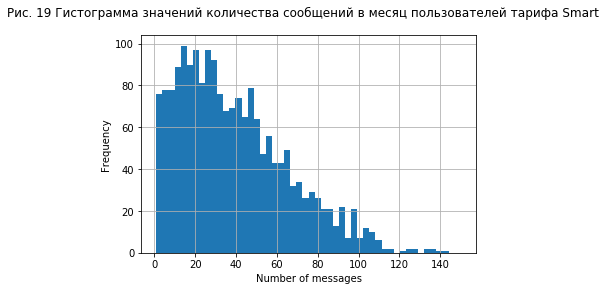

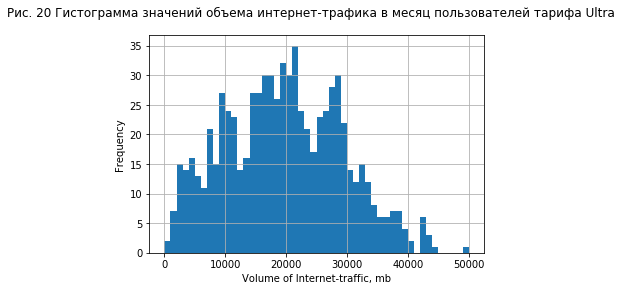

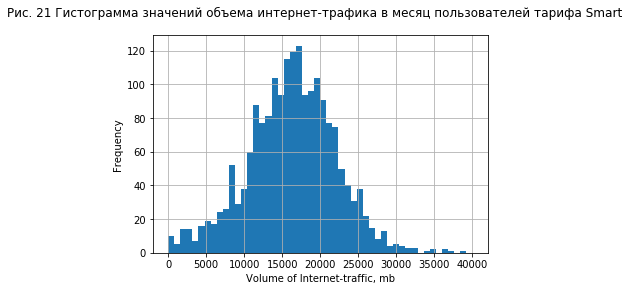

In [25]:
# Построим гистограмму по кажому тарифу

## Построим гистограммы значений продолжительности звонков, которое пользователи используют в месяц, по тарифам ultra и smart
df_ultra['call_duration'].hist(bins=50, range=(0.01, 1600))
plt.suptitle('Рис. 16 Гистограмма значений продолжительности звонков в месяц пользователей тарифа Ultra')
plt.xlabel('Call duration')
plt.ylabel('Frequency')
plt.show()

df_smart['call_duration'].hist(bins=50, range=(0.01, 1400))
plt.suptitle('Рис. 17 Гистограмма значений продолжительности звонков в месяц пользователей тарифа Smart')
plt.xlabel('Call duration')
plt.ylabel('Frequency')
plt.show()

## Построим гистограммы количества сообщений, которые пользователи тратят в месяц, по тарифам ultra и smart
df_ultra['message_number'].hist(bins=50, range=(1, 250))
plt.suptitle('Рис. 18 Гистограмма значений количества сообщений в месяц пользователей тарифа Ultra')
plt.xlabel('Number of messages')
plt.ylabel('Frequency')
plt.show()

df_smart['message_number'].hist(bins=50, range=(1, 150))
plt.suptitle('Рис. 19 Гистограмма значений количества сообщений в месяц пользователей тарифа Smart')
plt.xlabel('Number of messages')
plt.ylabel('Frequency')
plt.show()

## Построим гистограммы объема трафика, которые пользователи тратят в месяц, по тарифам ultra и smart
df_ultra['mb_used'].hist(bins=50, range=(0.01, 50000))
plt.suptitle('Рис. 20 Гистограмма значений объема интернет-трафика в месяц пользователей тарифа Ultra')
plt.xlabel('Volume of Internet-traffic, mb')
plt.ylabel('Frequency')
plt.show()

df_smart['mb_used'].hist(bins=50, range=(0.01, 40000))
plt.suptitle('Рис. 21 Гистограмма значений объема интернет-трафика в месяц пользователей тарифа Smart')
plt.xlabel('Volume of Internet-traffic, mb')
plt.ylabel('Frequency')
plt.show()

### Вывод:
В результате данного блока были построенны гистограммы значений продолжительности звонков, количества сообщений и объема интрнет-трафика по тарифам Ultra и Smart. <br> 
- Наиболее частая продолжительность звонков на тарифе Ultra составляет около 500 мин. в месяц (рис. 16), при этом у некоторых пользователей продолжительность достигает 1600 мин. в месяц. Наиболее частая продолжительность звонков на тарифе Smart составляет около 450 мин. в месяц (рис. 17). При этом продолжительность звонков редко превышает 1000 мин. в месяц.
- Наиболее частое количество сообщений на тарифе Ultra составляет около 40, на тарифе Smart около 20. При этом количество сообщений в месяц на тарифе Ultra может превышать 220, в то время как по тарифу Smart количество сообщений редко превышает 140.
- Наиболее частый объем интернет-трафика в месяц на тарифе Ultra превышает 20 гб., при этом на тарифе Smart составляет около 16 гб. Пользователи тарифа Ultra часто используют более 40 гб. трафика, при этом основная доля пользователей Smart используют до 27 гб. в месяц.

## 4. Проверка гипотез о средней выручке пользователей <a id="hypothesis"></a>

### Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
Начнем с формирования нулевой гипотезы Н0. Нулевую гипотезу сформируем таким образом, чтобы использовать знак равенства.
- **Нo**: средняя выручка пользователей тарифа Ultra равна выручке пользователей тарифа Smart.
Мы можем предположить отклонение наблюдаемого значения в обе стороны, поэтому сформируем двухстороннюю альтернативную гипотезу.
- **H1**: средняя выручка пользователей тарифа Ultra не равна выручке пользователей тарифа Smart.
Если мы отвергнем Ho, то можно сделать предположение, что средняя выручка пользователей тарифов Ultra и Smart различается.

Для сравнения средних значений двух генеральных совокупностей воспользуемся t-критерием Стьюдента, т.е. для того чтобы определить различаются ли средняя выручка пользователей тарифов Ultra и Smart, применим метод scipy.stats.ttest_ind. Для применения данного критерия необходимо, чтобы исходные данные имели нормальное распределение. Исходя из полученной гистограммы и графика плотности распределения значений дохода по двум тарифам, можно предположить, что в данном случае мы имеем дело с распределением Пуассона, которое при больших значениях средних стремится к нормальному. В связи с этим применение t-критерия Стьюдента обосновано. 

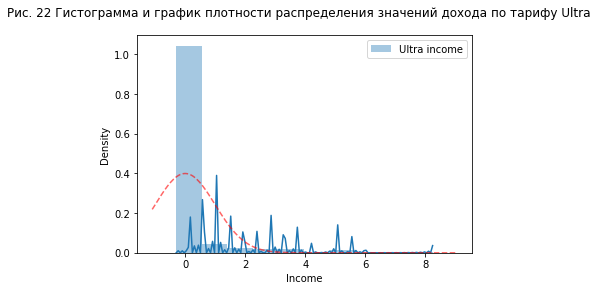

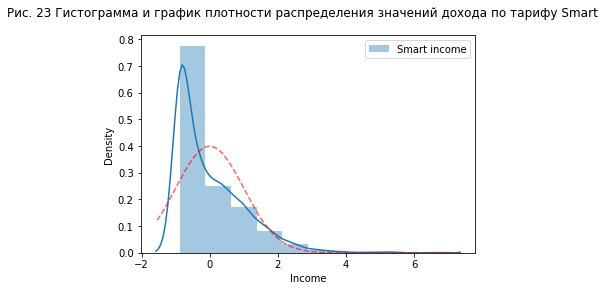

In [26]:
# Построим гистограммы распределений значений дохода по тарифам Ultra и Smart

# Масштабируем данные для приведения их к общей шкале без потери информации о различии диапазонов
normalized_ultra_income =(df_ultra['income_per_month'] - df_ultra['income_per_month'].mean()) / df_ultra['income_per_month'].std()
normalized_smart_income =(df_smart['income_per_month'] - df_smart['income_per_month'].mean()) / df_smart['income_per_month'].std()

# Построим график и гистограмму плотности распределения значений дохода по тарифу Ultra
sns.distplot(normalized_ultra_income, bins=10, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label = "Ultra income")
plt.suptitle('Рис. 22 Гистограмма и график плотности распределения значений дохода по тарифу Ultra')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.show()

# Построим график и гистограмму плотности распределения значений дохода сообщений по тарифу Smart
sns.distplot(normalized_smart_income, bins=10, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label = "Smart income") 
plt.suptitle('Рис. 23 Гистограмма и график плотности распределения значений дохода по тарифу Smart')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.show()

In [27]:
# Проверим гипотезу Нo: средняя выручка пользователя тарифа Ultra равна выручке пользователей тарифа Smart

income_ultra = df_ultra['income_per_month']
income_smart = df_smart['income_per_month']

alpha = 0.05 

results = st.ttest_ind(
    income_ultra, 
    income_smart,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.6525776189935743e-229
Отвергаем нулевую гипотезу


### Вывод:
Так как мы отвергли гипотезу Hо о равенстве средней выручки пользователей тарифа Ultra выручке пользователей тарифа Smart.  Полученное значение p-value говорит о том, что средний доход от разных тарифов неодинаков, а вероятность получить такое различие случайно крайне мала. Можно сделать предположение, что средняя выручка пользователей тарифов Ultra и Smart различается.

### Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Начнем с формирования нулевой гипотезы Н0. Нулевую гипотезу сформируем таким образом, чтобы использовать знак равенства.
- **Нo**: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
Мы можем предположить отклонение наблюдаемого значения в обе стороны, поэтому сформируем двухстороннюю альтернативную гипотезу.
- **H1**: средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов.
Если мы отвергнем Ho, то можно сделать предположение, что средняя выручка пользователей из Москвы и выручка пользователей из других регионов различается.

Обоснование выбора критерия для проведения проверки гипотезы аналогично предыдущему.

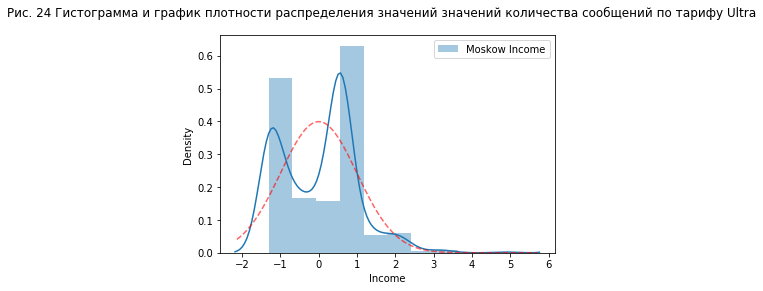

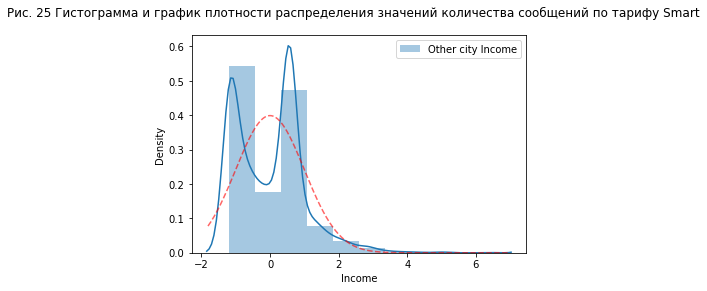

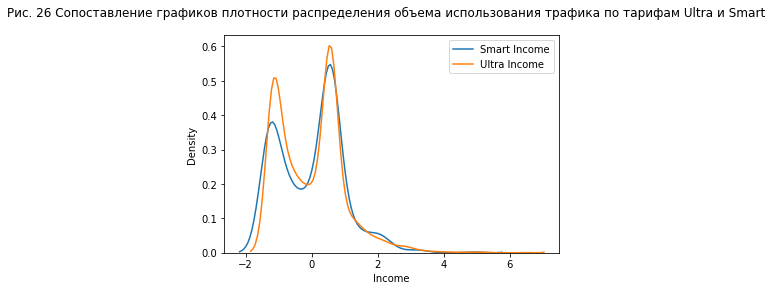

In [28]:
# Построим гистограммы распределений значений дохода по городам Москва и иные.
df_income_moskow = df_grouped.query('city == "Москва"')['income_per_month']
df_income_other_city = df_grouped.query('city != "Москва"')['income_per_month']

# Масштабируем данные для приведения их к общей шкале без потери информации о различии диапазонов
normalized_income_moskow =(df_income_moskow - df_income_moskow.mean()) / df_income_moskow.std()
normalized_income_other_city =(df_income_other_city - df_income_other_city.mean()) / df_income_other_city.std()

# Построим график и гистограмму плотности распределения значений дохода по г. Москва
sns.distplot(normalized_income_moskow, bins=10, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label = "Moskow Income")
plt.suptitle('Рис. 24 Гистограмма и график плотности распределения значений значений количества сообщений по тарифу Ultra')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.show()

# Построим график и гистограмму плотности распределения значений дохода по иным городам
sns.distplot(normalized_income_other_city, bins=10, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label = "Other city Income") 
plt.suptitle('Рис. 25 Гистограмма и график плотности распределения значений количества сообщений по тарифу Smart')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.show()

# Сделаем сопоставление графиков плотности распределения значений дохода по городам Москва и иные.
sns.distplot(normalized_income_moskow, bins=50, hist=False, label = "Smart Income")
sns.distplot(normalized_income_other_city, bins=50, hist=False, label = "Ultra Income")
plt.suptitle('Рис. 26 Сопоставление графиков плотности распределения объема использования трафика по тарифам Ultra и Smart')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()

In [29]:
df_income_moskow = df_grouped.query('city == "Москва"')['income_per_month']
df_income_other_city = df_grouped.query('city != "Москва"')['income_per_month']

# Проверим гипотезу Нo: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

alpha = 0.05 

results = st.ttest_ind(
    df_income_moskow, 
    df_income_other_city)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.4836504757759247
Не получилось отвергнуть нулевую гипотезу


### Вывод
В результате проверки гипотезы Ho: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов не была отвергнута. 
Полученное значение p-value говорит о том, что хотя средний доход в Москве и других городах неодинаков, с вероятностью в около 48% такое различие можно получить случайно. Исходя из этого, утверждать о различиях в среднем доходе некорректно.
Можно предположить, что компания получает доход независимо от региона пользователя.

### 5. Общий вывод  <a id="result"></a>

В результате исследования данных мобильного оператора был проведен первичный анализ данных, изучены гистограммы значений продолжительности звонков и объема интернет трафика. Анализ гистограмм позволил выявить ошибки высокую долю нулевых значений, которые затем были удалены т.к. не имели значимости для исследования. Затем была проведена группировка данных в таблицах с информациео о звонках, сообщениях и интернет-сессиях по пользователю и месяцу. Проведение группировки позволило рассчитать количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам. Сгруппированные таблицы были объединены, а также дополнены информацией о пользователях и о тарифных планах. В результате был получен единый датасет, на основе которого было проведено дальнейшее исследование и рассчитана ежемесячная выручка по каждому пользователю. <br>
Анализ поведения пользователей свидетельствует о том, что пользователи тарифа Ultra больше времени посвещают звонкам, общению через сообщения и активнее пользуются интернетом. При этом средняя продолжительность звонков и интрнет-сессий на тарифе Ultra в некоторые месяцы превышает в 2 раза продолжительность звонков и интрнет-сессий на тарифе Smart. 
<br>Тем не менее, благодаря своей стоимости тариф Smart наиболее популярен среди пользователей. По данным оператора за 2018 г. количество пользователей на тарифе Smart в 2,4 раза превышало число пользователей тарифа Ultra. Исходя из этого, если оператор решит повышать доходы компании засчет применения эффекта масштаба, наиболее целесообразно выбрать в качестве объекта маркетинга тариф Smart. Однако он не так выгоден для компании как тариф Ultra, средняя доходность по которому значительно выше. Так как оператор оценивает тарифы по доходности, тариф Ultra стоит выбрать в каачестве объекта маркетинга. <br>
На этапе проверки гипотез были проверены две гипотезы. <br>Первая гипотеза о равенстве средней выручки от пользователей тарифа Smart и пользователей тарифа Ultra была отвергнута и принята гипотеза о различии выручки пользователей тарифов Ultra и Smart.
<br> Вторая гипотеза, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов была отвергнута и принята гипотеза, что выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Данный факт можно объяснить тем, что у оператора отсутствуют дифференцированные ставки в зависимости от города, однако многие другие операторы активно используют данный прием определяя стоимость тарифа в каждом городе исходя из покупательной способности  и конъюнктуры рынка в каждом субъекте страны.